# SMS Spam Collection Data Set Project using NLP:

In this notebook I will use a higher level of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand.

I'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). This dataset was already downloaded in the folder for this project.

The file (SMSSpamCollection) that I am using contains a collection of more than 5,000 SMS phone messages. 

In [1]:
f = open(r"smsspamcollection\SMSSpamCollection","r")

In [2]:
f.readline()

# The readline() method returns one line from the file.
# note the the tab separation "\t" and new line "\n".

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'

In [3]:
f.readlines()

# The readlines() method returns a list containing each line in the file as a list item.

['ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.\n',
 'spam\tHad your mobile 11 months or more? U R entitled to Updat

In [4]:
f.close()

I will go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages

In [5]:
messages = [line.rstrip() for line in open("smsspamcollection//SMSSpamCollection","r")]
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [6]:
print(len(messages))

5574


In [7]:
print(messages[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


A collection of texts is also sometimes called "corpus". I will print the first ten messages and number them:

In [8]:
for i,j in enumerate(messages[:10]):
    print(i,j)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Due to the spacing it is apparent that this is a "tab separated values" file (TSV), where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself.

Using these labeled ham and spam examples, I will train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, I will be able to classify arbitrary unlabeled messages as ham or spam.

Instead of parsing the TSV file manually using Python, I will take advantage of the pandas library.

In [9]:
import numpy as np
import pandas as pd

In [10]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection",sep="\t",names=["label","message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
len(messages)

5572

In [13]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


There are 2 unique labels (ham and spam). There is less unique messages which indicates that some messages are duplicates.

Now, I will group by the label (spam/ham) to describe the data:

In [14]:
messages.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages.groupby("label").describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

I am able to see the most repeated messages as well as the total vs unique number of messages for both ham or spam.

[Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering) is a very large part of spam detection in general. The better the domain knowledge on the data, the better the ability to engineer more features from it.

In this case, I will make a new column to detect how long the text messages are:

In [16]:
messages["message"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64

In [17]:
messages["length"] = messages["message"].apply(len)
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


## Data Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

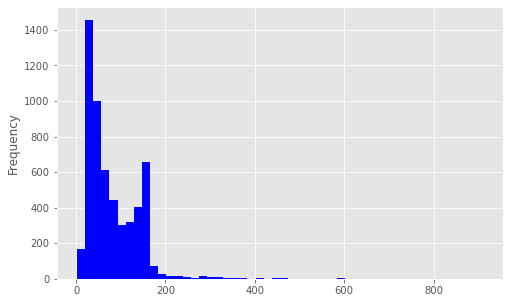

In [19]:
plt.style.use("ggplot")
plt.figure(figsize=(8,5))
messages["length"].plot(kind="hist",bins=50,color="b")

With the bin size of 50, it looks like text length may be a good feature to think about. As the x-axis goes all the way to 1000ish, this must mean that there is some really long message.

In [20]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

There is a message with 910 characters. I will use masking to find this message.

In [21]:
messages[messages["length"] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [22]:
messages[messages["length"] == 910]["message"]

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [23]:
messages[messages["length"] == 910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

I want to focus on the idea of trying to see if message length is a distinguishing feature between ham and spam:

In [24]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

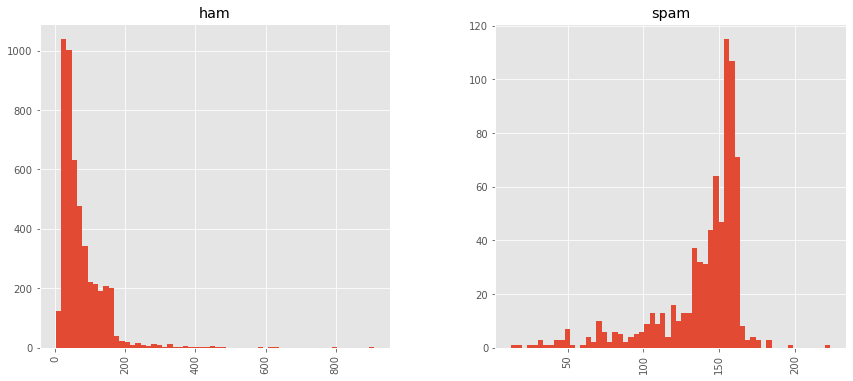

In [25]:
messages.hist(column="length",by="label",bins=60,figsize=(14,6))

# this is pandas' version of seaborn's FacetGrid

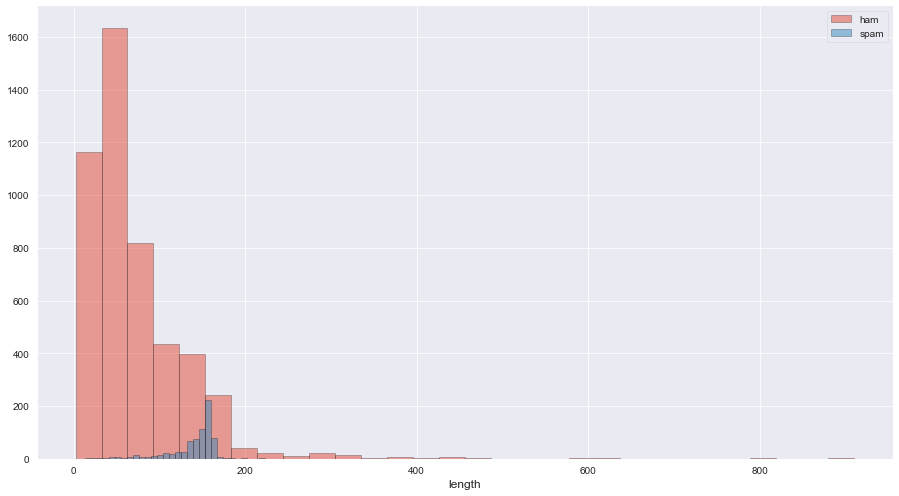

In [26]:
sns.set_style(style="darkgrid")

fg = sns.FacetGrid(data=messages,hue="label",height=7,aspect=1.8)
fg.map(plt.hist,"length",alpha=0.5,bins=30,ec="k")
plt.legend(loc=0)

Through just basic EDA I've been able to discover a trend that spam messages tend to have more characters.

Now I will begin to process the data so it can eventually be manipulated using SciKit Learn.

## Text Pre-processing

My main issue with the data is that it is all in text format (strings). The classification algorithms will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this part of the project, I will convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, I will write a function that will split a message into its individual words and return a list. I will also remove very common words, ('the', 'a', etc..). To do this, I will take advantage of the **NLTK library**. It's pretty much the standard library in Python for processing text and has a lot of useful features. I will only use some of the basic ones here.

I will create a function that will process the string in the message column, then I will be able to just use apply() in pandas to process all the text in the DataFrame.

First removing punctuation. I am able to just take advantage of Python's built-in **string library** to get a quick list of all the possible punctuation:

In [27]:
import string

In [28]:
mess = "Sample message! Notice: 'it has punctuation'."

# sample text

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
nopunc = [i for i in mess if i not in string.punctuation]
nopunc

# check characters to see if they are in punctuation

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [31]:
nopunc = "".join(nopunc)
nopunc

# join the characters again to form the string.

'Sample message Notice it has punctuation'

In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

To remove stopwords. I will import a list of english stopwords from NLTK.

In [33]:
import nltk

In [34]:
# nltk.download_shell()

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words("english")

# these are very common words that will probably not be helpful in determining the class (ham or spam).

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
clean_mess

# putting these steps together

['Sample', 'message', 'Notice', 'punctuation']

Now I will put these together in a function to apply it to our DataFrame later on:

In [38]:
def text_process(mess):
    """
    1.remove punctuation
    2.remove stop words
    3.return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [39]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now I will "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Note:
There is the possibility of some warnings or errors appearing since there are symbols that I didn't account for or that weren't in Unicode (like a British pound symbol).

In [40]:
messages["message"].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [41]:
messages["message"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so for now, I will just focus on using what I have to convert my list of words to an actual vector that SciKit-Learn can use.

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

# split the dataset into training and validation datasets

I do the train/test split before the CountVectorizer to properly simulate the real world where our future data contains words the model has not seen before

In [43]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
X = messages["message"]
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [45]:
y = messages["label"]
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: message, Length: 4457, dtype: object

In [48]:
y_train

1978    spam
3989     ham
3935     ham
4078     ham
4086    spam
        ... 
3772     ham
5191     ham
5226     ham
5390     ham
860      ham
Name: label, Length: 4457, dtype: object

In [49]:
X_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
4264    Den only weekdays got special price... Haiz......
2439        I not busy juz dun wan 2 go so early.. Hee.. 
5556    Yes i have. So that's why u texted. Pshew...mi...
4205    How are you enjoying this semester? Take care ...
4293                                                G.W.R
Name: message, Length: 1115, dtype: object

In [50]:
y_test

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
4264    ham
2439    ham
5556    ham
4205    ham
4293    ham
Name: label, Length: 1115, dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
encoder = LabelEncoder()

# label encode the target variable 

In [53]:
y_train = encoder.fit_transform(y_train)
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [54]:
y_test = encoder.transform(y_test)
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

In [56]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.


The simplest approach is the the bag-of-words approach, where each unique word in a text will be represented by one number.

I will do that in three steps using the bag-of-words model:
1. Count how many times does a word occur in each message (Known as term frequency).
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency).
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

STEP 1:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  I will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [57]:
messages.head(4)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
bow_transformer = CountVectorizer(analyzer=text_process)

# analyzer: If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.

In [60]:
bow_transformer.fit(X_train)

# This creates a sparse matrix of words count vs messages

CountVectorizer(analyzer=<function text_process at 0x00000177991813A0>)

In [61]:
print(len(bow_transformer.vocabulary_))

# total number of vocab words
# I have 10,049 unique words in my X_train messages

10049


In [62]:
bow_transformer.vocabulary_["university"]

# random word selected: "university"

9438

In [63]:
# or use:
    
bow_transformer.get_feature_names()

['0',
 '008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '061104',
 '07008009200',
 '07046744435',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0794674629107880867867',
 '0796XXXXXX',
 '07973788240',
 '07XXXXXXXXX',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18s',
 '0870',
 '08700621170150p',
 '0870121

In [64]:
len(bow_transformer.get_feature_names())

# I have 10,049 unique words in my X_train messages

10049

In [65]:
X_train_count = bow_transformer.transform(X_train)
X_train_count

# filling in the sparse matrix using .transform() on our Bag-of-Words (bow) transformed object
# and transform the training and validation data using count vectorizer object

<4457x10049 sparse matrix of type '<class 'numpy.int64'>'
	with 40488 stored elements in Compressed Sparse Row format>

In [66]:
X_test_count = bow_transformer.transform(X_test)
X_test_count

<1115x10049 sparse matrix of type '<class 'numpy.int64'>'
	with 8574 stored elements in Compressed Sparse Row format>

In [67]:
X_train_count

<4457x10049 sparse matrix of type '<class 'numpy.int64'>'
	with 40488 stored elements in Compressed Sparse Row format>

In [68]:
X_train_count.get_shape

<bound method spmatrix.get_shape of <4457x10049 sparse matrix of type '<class 'numpy.int64'>'
	with 40488 stored elements in Compressed Sparse Row format>>

In [69]:
print(X_train_count)

  (0, 379)	1
  (0, 759)	1
  (0, 1353)	1
  (0, 1611)	1
  (0, 3017)	1
  (0, 3135)	1
  (0, 3200)	1
  (0, 3833)	1
  (0, 5533)	1
  (0, 6210)	1
  (0, 8488)	1
  (0, 9673)	1
  (0, 9740)	1
  (0, 9991)	1
  (1, 1928)	1
  (1, 3303)	1
  (1, 4080)	1
  (1, 5383)	1
  (1, 5482)	1
  (1, 5580)	1
  (1, 6274)	1
  (1, 6692)	1
  (1, 6814)	1
  (1, 7330)	1
  (1, 8338)	1
  :	:
  (4452, 5480)	1
  (4452, 6059)	1
  (4452, 6859)	1
  (4452, 7296)	1
  (4452, 7447)	1
  (4452, 8718)	1
  (4452, 9781)	1
  (4452, 9796)	1
  (4453, 2051)	1
  (4453, 3301)	1
  (4453, 4645)	1
  (4453, 6763)	1
  (4454, 2881)	1
  (4454, 6198)	1
  (4454, 6400)	1
  (4454, 8749)	1
  (4454, 8750)	1
  (4455, 2661)	1
  (4455, 6599)	1
  (4455, 8485)	1
  (4455, 9254)	1
  (4456, 7337)	1
  (4456, 8390)	1
  (4456, 8711)	1
  (4456, 9053)	1


In [70]:
print('Shape of X_train Sparse Matrix: ', X_train_count.shape)
# shape of sparse matrix
# 4457 (from total of 5572) messages vs entire vocabulary (10,049)


print('Amount of Non-Zero occurences: ', X_train_count.nnz)
# Non zero occurences

Shape of X_train Sparse Matrix:  (4457, 10049)
Amount of Non-Zero occurences:  40488


In [71]:
sparsity_x_train = (100 * X_train_count.nnz / (X_train_count.shape[0]*X_train_count.shape[1]))
print("sparsity of X_train: {}".format(sparsity_x_train))

sparsity of X_train: 0.09039842085872561


In [72]:
print('Shape of X_test Sparse Matrix: ', X_test_count.shape)
# shape of sparse matrix
# 1115 (from a total of 5572) messages vs entire vocabulary (10,049)


print('Amount of Non-Zero occurences: ', X_test_count.nnz)
# Non zero occurences

Shape of X_test Sparse Matrix:  (1115, 10049)
Amount of Non-Zero occurences:  8574


In [73]:
sparsity_x_test = (100 * X_test_count.nnz / (X_test_count.shape[0]*X_test_count.shape[1]))
print("sparsity of X_test: {}".format(sparsity_x_test))

sparsity of X_test: 0.07652190365861984


STEP 2:

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Now, I will go ahead and perform this using SciKit Learn:

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

In [75]:
tfidf_transobj = TfidfTransformer()

In [76]:
tfidf_transobj.fit(X_train_count)

TfidfTransformer()

In [77]:
# note "messages_bow" is a sparse matrix:
X_train_count

<4457x10049 sparse matrix of type '<class 'numpy.int64'>'
	with 40488 stored elements in Compressed Sparse Row format>

In [78]:
tfidf_transobj.idf_

array([8.01616115, 8.30384323, 8.70930833, ..., 8.70930833, 6.76339818,
       8.70930833])

In [79]:
tfidf_transobj.idf_[747]

8.70930833338587

In [80]:
X_train_tfidf = tfidf_transobj.transform(X_train_count)
X_train_tfidf

# To transform the entire X_train bag-of-words corpus into TF-IDF corpus at once

<4457x10049 sparse matrix of type '<class 'numpy.float64'>'
	with 40488 stored elements in Compressed Sparse Row format>

In [81]:
X_test_tfidf = tfidf_transobj.transform(X_test_count)
X_test_tfidf

<1115x10049 sparse matrix of type '<class 'numpy.float64'>'
	with 8574 stored elements in Compressed Sparse Row format>

## Training a model

With messages represented as vectors, I am finally able to train the spam/ham classifier. Now I can actually use almost any sort of classification algorithms. For a [variety of reasons](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf), the Naive Bayes classifier algorithm is a good choice. The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
spam_detect_model = MultinomialNB()

In [84]:
spam_detect_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [85]:
all_pred = spam_detect_model.predict(X_test_tfidf)
all_pred

array([0, 0, 0, ..., 0, 0, 0])

## Model Evaluation

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [87]:
print(classification_report(y_test,all_pred))
print("\n")
print(confusion_matrix(y_test,all_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



[[966   0]
 [ 35 114]]


In [88]:
accuracy_score(y_test,all_pred)

# calculate accuracy of class predictions

0.968609865470852

In [89]:
# examine class distribution
print(messages["label"].value_counts())

# there is a majority class of ham (0) in the original dataset, hence the classes are skewed

ham     4825
spam     747
Name: label, dtype: int64


In [90]:
print("Original results 'y_test' as an array:")
print(y_test)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
print("0 = ham & 1 = spam")

Original results 'y_test' as an array:
[0 0 0 ... 0 0 0]
Frequency of unique values of the said array:
[[  0   1]
 [966 149]]
0 = ham & 1 = spam


In [91]:
y_test = encoder.inverse_transform(y_test)
y_test

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [92]:
all_pred = encoder.inverse_transform(all_pred)
all_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [93]:
print(y_test)
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(unique_elements)
print(counts_elements)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'spam']
[966 149]


In [94]:
# null accuracy (for multi-class classification problems) - accuracy that could be achieved by always predicting the most frequent class

null_accuracy = 966 / (966+149)
print('Null accuracy:', null_accuracy)

Null accuracy: 0.8663677130044843


In this case, it can seen that my accuracy (0.9686) is higher than the null accuracy (0.8664).

AUC is useful as a single number summary of classifier performance (Higher value = better classifier).

If we randomly chose one positive and one negative observation, AUC represents the likelihood that the classifier will assign a higher predicted probability to the positive observation. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is useful even when there is high class imbalance (unlike classification accuracy) such as Null accuracy of almost 99%.

In [95]:
from sklearn.metrics import roc_auc_score

In [96]:
y_test = encoder.transform(y_test)
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
all_pred = encoder.transform(all_pred)

In [98]:
roc_auc_score(y_test,all_pred)

0.8825503355704698

## Comparing models

Logistic Regression:

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
from sklearn.pipeline import Pipeline

In [101]:
pipe_obj = Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf",TfidfTransformer()),
    ("classifier", LogisticRegression())    
])

In [102]:
pipe_obj.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000177991813A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [103]:
pred = pipe_obj.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

Evaluation:

In [104]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       0.99      0.69      0.81       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



[[965   1]
 [ 46 103]]


In [105]:
# calculate accuracy of class predictions
# Again, there is a majority class of 0 (ham), hence the classes are skewed
print("Accuracy:",accuracy_score(y_test,pred))

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(966 / (966+149)))

print("AUC:",roc_auc_score(y_test,pred))

Accuracy: 0.957847533632287
Manual null accuracy: 0.8663677130044843
AUC: 0.8451199855489321


In this case, it can seen that my accuracy (0.9578) is higher than the null accuracy (0.8664).
This is a good classifier but not as good as the previous model. Using Naive Bayes Classifier, I was able to obtain a slightly higher accuracy and less false positives and false negatives.

Random Forest Classifier:

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
pipe_obj1 = Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf",TfidfTransformer()),
    ("classifier", RandomForestClassifier())    
])

In [108]:
pipe_obj1.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000177991813A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [109]:
pred1 = pipe_obj1.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
print(classification_report(y_test,pred1))
print("\n")
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



[[966   0]
 [ 26 123]]


In [111]:
print("Accuracy:",accuracy_score(y_test,pred1))

print('Manual null accuracy:',(966 / (966+149)))

print("AUC:",roc_auc_score(y_test,pred1))

Accuracy: 0.9766816143497757
Manual null accuracy: 0.8663677130044843
AUC: 0.912751677852349


In this case, it can seen that my accuracy (0.9749) is higher than the null accuracy (0.8664).
This is a very good classifier with the highest AUC score (0.9128). In fact, this model is slightly better than both previous models. By using a Random Forest Classifier, I was able to obtain a slightly higher accuracy with 6 less false positives and 0 false negatives.